<a href="https://colab.research.google.com/github/NhatMinh1905/BTL_OOP/blob/main/CNTT_17_01_Tr%E1%BA%A7n_Nh%E1%BA%ADt_Minh_BKT2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Số lượng giá trị bị thiếu:
Ngày bán          0
Tên sản phẩm      0
Số lượng bán      0
Giá               0
Tổng doanh thu    0
Mùa               0
dtype: int64
Thống kê mô tả dữ liệu:
                            Ngày bán  Số lượng bán            Giá  \
count                             10      10.00000      10.000000   
mean   1986-05-10 07:12:00.000031872       7.00000  300000.000000   
min    1970-01-01 00:00:00.000045292       3.00000  150000.000000   
25%    1970-01-01 00:00:00.000045332       5.00000  250000.000000   
50%    1970-01-01 00:00:00.000045572       6.50000  300000.000000   
75%    2010-08-26 18:00:00.000011264       9.50000  350000.000000   
max              2024-11-15 00:00:00      12.00000  450000.000000   
std                              NaN       2.94392  105409.255339   

       Tổng doanh thu  
count    1.000000e+01  
mean     1.910000e+06  
min      1.200000e+06  
25%      1.387500e+06  
50%      1.775000e+06  
75%      2.212500e+06  
max      3.500000e+06  
st

<ipython-input-6-071de4ae9d54>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Mùa", y="Tổng doanh thu", data=df, estimator=sum, palette="coolwarm")


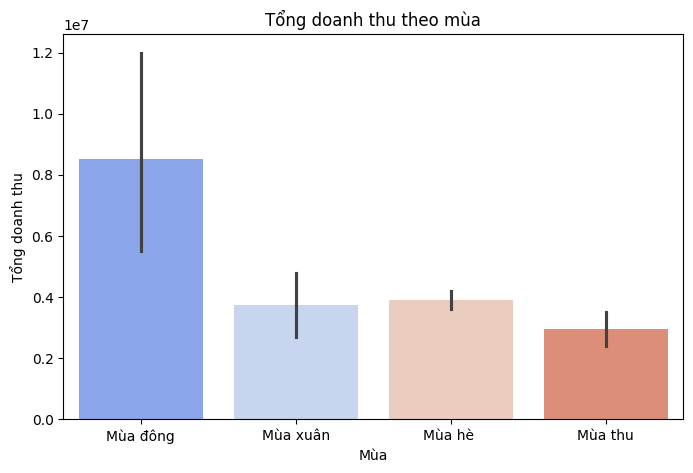

<ipython-input-6-071de4ae9d54>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Mùa", y="Số lượng bán", data=df, palette="coolwarm")


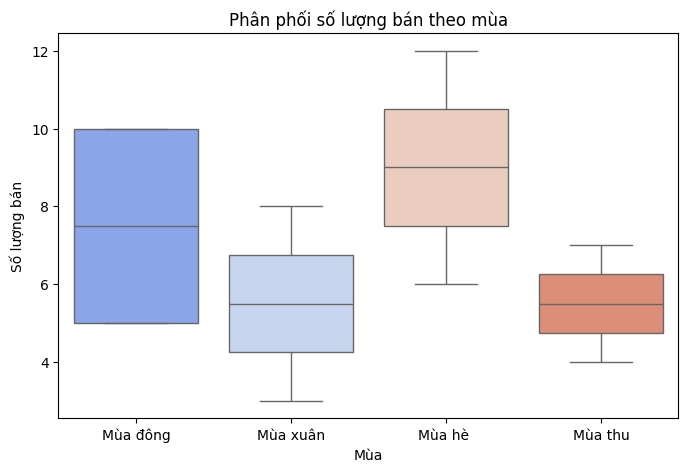

Mean Absolute Error: 304504.340690013
Mean Squared Error: 92775606403.16957


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Bước 1: Thu thập dữ liệu
file_path = "/content/drive/MyDrive/CNTT17-01_Trần Nhật Minh_BKT2.xlsx.xlsx"
df = pd.read_excel(file_path)

# Bước 2: Làm sạch dữ liệu
# Chuyển đổi cột 'Ngày bán' sang định dạng ngày tháng
df["Ngày bán"] = pd.to_datetime(df["Ngày bán"], errors='coerce', dayfirst=True)

# Kiểm tra dữ liệu bị thiếu
print("Số lượng giá trị bị thiếu:")
print(df.isnull().sum())

# Điền giá trị thiếu nếu cần (ở đây không có giá trị thiếu nên bỏ qua)

# Bước 3: Phân tích dữ liệu (EDA)
# Thống kê cơ bản
print("Thống kê mô tả dữ liệu:")
print(df.describe())

# Biểu đồ tổng doanh thu theo mùa
plt.figure(figsize=(8, 5))
sns.barplot(x="Mùa", y="Tổng doanh thu", data=df, estimator=sum, palette="coolwarm")
plt.title("Tổng doanh thu theo mùa")
plt.xlabel("Mùa")
plt.ylabel("Tổng doanh thu")
plt.show()

# Biểu đồ số lượng bán theo mùa
plt.figure(figsize=(8, 5))
sns.boxplot(x="Mùa", y="Số lượng bán", data=df, palette="coolwarm")
plt.title("Phân phối số lượng bán theo mùa")
plt.xlabel("Mùa")
plt.ylabel("Số lượng bán")
plt.show()

# Bước 4: Xây dựng mô hình dự đoán doanh thu
# Chuyển đổi 'Mùa' sang dạng số
df["Mùa"] = df["Mùa"].astype("category").cat.codes

# Chọn biến đầu vào (X) và đầu ra (y)
X = df[["Số lượng bán", "Giá", "Mùa"]]
y = df["Tổng doanh thu"]

# Chia tập dữ liệu thành train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Xây dựng mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X_train, y_train)

# Dự đoán trên tập test
y_pred = model.predict(X_test)

# Đánh giá mô hình
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
